In [134]:
import networkx as nx
from collections import Counter
import math
import numpy as np
import matplotlib.pyplot as plt
import copy
import time as time
import scipy as scp
from scipy import stats as ST
import random

**Solution 5.** Generation of random graphs. The following cell before the next text box will give detailed description of the generation of random graphs with the given probabilities.

In [135]:

n = 1000
p_set = [0.001,0.005, 0.01]
ER_graph = {}

m_set = [1,2,5]
BA_graph = {}

k=4
p_set_WS = [0,0.1,1]
WS_graph = {}

graph_lab = {}
lab_ind = 0

In [136]:
for p in p_set:
    ER_graph["ER"+str(p)] = nx.erdos_renyi_graph(n,p)
    graph_lab["ER"+str(p)] = f"Erdos-Reyni_{p}" 
    print(f"Generated the E-R graph with p{p}-->",ER_graph["ER"+str(p)])

Generated the E-R graph with p0.001--> Graph with 1000 nodes and 453 edges
Generated the E-R graph with p0.005--> Graph with 1000 nodes and 2503 edges
Generated the E-R graph with p0.01--> Graph with 1000 nodes and 4898 edges


In [137]:
for m in m_set:
    BA_graph["BA"+str(m)] = nx.barabasi_albert_graph(n,m)
    graph_lab["BA"+str(m)] = f"Barabasi-Albert_{m}" 
    print(f"Generated the B-A graph with m{m}-->",BA_graph["BA"+str(m)])

Generated the B-A graph with m1--> Graph with 1000 nodes and 999 edges
Generated the B-A graph with m2--> Graph with 1000 nodes and 1996 edges
Generated the B-A graph with m5--> Graph with 1000 nodes and 4975 edges


In [138]:
for p_WS in p_set_WS:
    WS_graph["WS"+str(p_WS)] = nx.watts_strogatz_graph(n,k,p_WS)
    graph_lab["WS"+str(p_WS)] = f"Watts-Strogatz_{p_WS}" 
    print(f"Generated the W-S graph with p{p_WS}-->",WS_graph["WS"+str(p_WS)])

Generated the W-S graph with p0--> Graph with 1000 nodes and 2000 edges
Generated the W-S graph with p0.1--> Graph with 1000 nodes and 2000 edges
Generated the W-S graph with p1--> Graph with 1000 nodes and 2000 edges


The following part addresses the generation of the Social Network Graph downloaded from the link https://snap.stanford.edu/data/CollegeMsg.html

In [139]:
G1 = nx.read_adjlist('CollegeMsg.txt',delimiter=' ')
print(G1)
G_rep = copy.deepcopy(G1)


Graph with 60810 nodes and 73499 edges


In [140]:
node_2_delete = []
for n in G_rep.nodes:
    if int(n)>2000:
        node_2_delete.append(n)
G_rep.remove_nodes_from(node_2_delete)
print("Generate the social network with optimized connections as: ", G_rep)


Generate the social network with optimized connections as:  Graph with 1899 nodes and 13838 edges


Solution 5(a): The following section addresses the generation of degree distribution similar to the one given in the link: https://stackoverflow.com/questions/16489655/plotting-log-binned-network-degree-
distributions. 
Legend: ER - Erdos-Renyi, BA - Barabasi-Albert, WS - Watts-Strogatz and social - Social Network

In [141]:
all_graphs = {**ER_graph, **BA_graph, **WS_graph}
all_graphs["social"] = G_rep
graph_lab["social"] = "social"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


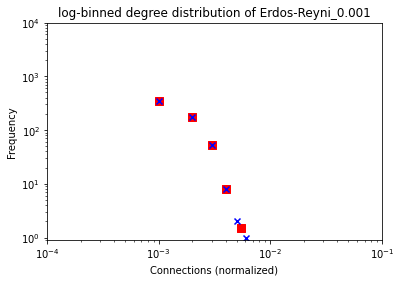

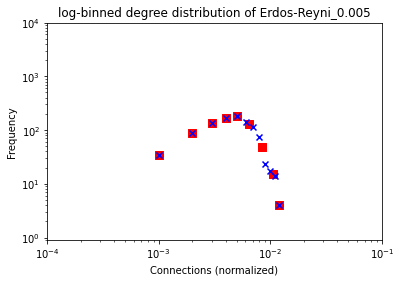

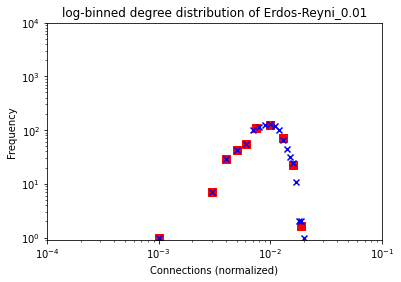

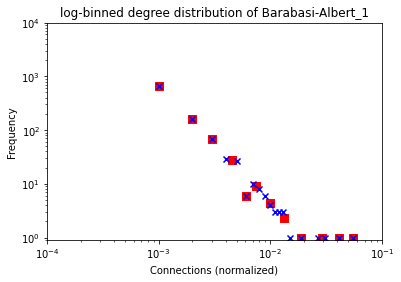

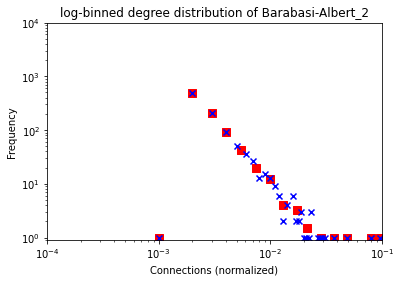

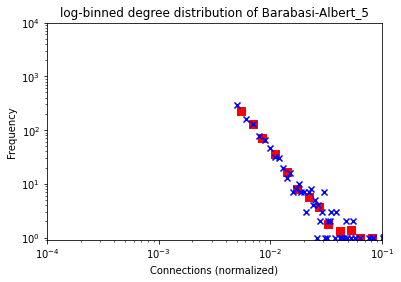

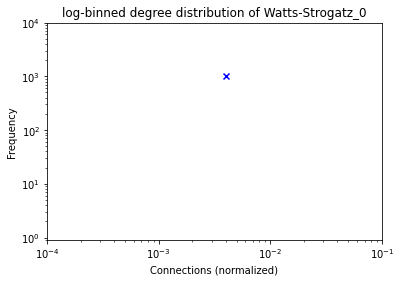

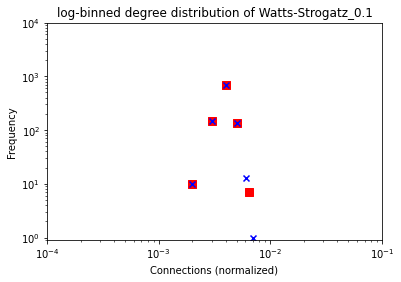

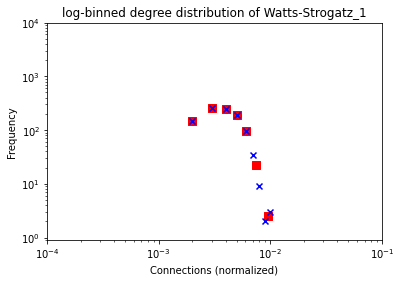

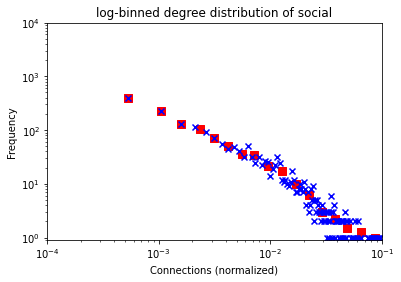

In [142]:
def drop_zeros(a_list):
    return [i for i in a_list if i>0]

def log_binning(counter_dict,bin_count=35):
    max_x = math.log10(max(counter_dict.keys()))
    max_y = math.log10(max(counter_dict.values()))
    max_base = max([max_x,max_y])

    min_x = math.log10(min(drop_zeros(counter_dict.keys())))

    bins = np.logspace(min_x,max_base,num=bin_count)

    bin_means_y = np.histogram(list(counter_dict.keys()), bins, weights=list(counter_dict.values()))[0] / np.histogram(list(counter_dict.keys()), bins)[0]
    bin_means_x = np.histogram(list(counter_dict.keys()), bins, weights=list(counter_dict.keys()))[0] / np.histogram(list(counter_dict.keys()), bins)[0]
    return bin_means_x,bin_means_y

# plotting the log-binned degree distribution for each of the 10 graphs
for i in all_graphs.keys():
    ba_g = all_graphs[i]
    ba_c = nx.degree_centrality(ba_g)
    ba_c2 = dict(Counter(list(ba_c.values())))
    ba_x, ba_y = log_binning(ba_c2, 50)

    plt.xscale('log')
    plt.yscale('log')
    plt.scatter(ba_x, ba_y, c='r', marker='s', s=50)
    plt.scatter(ba_c2.keys(), ba_c2.values(), c='b', marker='x')
    plt.xlim((1e-4, 1e-1))
    plt.ylim((.9, 1e4))
    plt.xlabel('Connections (normalized)')
    plt.ylabel('Frequency')
    plt.title('log-binned degree distribution of ' + graph_lab[i])
    plt.show()

Solution 5(b): Largest Connected Components

In [143]:
largest_cc = {}
largest_cc_graph = {}
for i in all_graphs.keys():
  Graph = all_graphs[i]
  num_cc  = nx.number_connected_components(Graph)
  print(f"{i}  has {num_cc} connected component(s)")
  largest_cc[i] = max(nx.connected_components(Graph),key=len)
  largest_cc_graph[i] = Graph.subgraph(largest_cc[i]).copy()
  num_nodes = nx.number_of_nodes(largest_cc_graph[i])
  frac_nodes = num_nodes / nx.number_of_nodes(Graph)
  print(f"The percentage of nodes in the largest connected component is: {100*frac_nodes} \n")

ER0.001  has 548 connected component(s)
The percentage of nodes in the largest connected component is: 11.4 

ER0.005  has 8 connected component(s)
The percentage of nodes in the largest connected component is: 99.3 

ER0.01  has 1 connected component(s)
The percentage of nodes in the largest connected component is: 100.0 

BA1  has 1 connected component(s)
The percentage of nodes in the largest connected component is: 100.0 

BA2  has 1 connected component(s)
The percentage of nodes in the largest connected component is: 100.0 

BA5  has 1 connected component(s)
The percentage of nodes in the largest connected component is: 100.0 

WS0  has 1 connected component(s)
The percentage of nodes in the largest connected component is: 100.0 

WS0.1  has 1 connected component(s)
The percentage of nodes in the largest connected component is: 100.0 

WS1  has 1 connected component(s)
The percentage of nodes in the largest connected component is: 100.0 

social  has 4 connected component(s)
The p

Solution 5(c): Average shorted path length

In [144]:
for i in all_graphs.keys():
  shortest_path = nx.average_shortest_path_length(largest_cc_graph[i])
  print(f"The average shortest path length in the graph {i} is :",shortest_path)

The average shortest path length in the graph ER0.001 is : 10.581741965533302
The average shortest path length in the graph ER0.005 is : 4.466263846928499
The average shortest path length in the graph ER0.01 is : 3.283031031031031
The average shortest path length in the graph BA1 is : 7.061383383383383
The average shortest path length in the graph BA2 is : 4.043725725725726
The average shortest path length in the graph BA5 is : 2.9692892892892893
The average shortest path length in the graph WS0 is : 125.37537537537537
The average shortest path length in the graph WS0.1 is : 8.899577577577578
The average shortest path length in the graph WS1 is : 5.300956956956957
The average shortest path length in the graph social is : 3.0551670838037994


**Solution 8:**

Solution 8 : Generation of the graphs

In [145]:
Q_8_graphs = {}

G_ER_1 = nx.gnp_random_graph(500,0.002)
G_ER_2 = nx.gnp_random_graph(5000,0.0002)
G_BA_1 = nx.barabasi_albert_graph(500,2)
G_BA_2 = nx.barabasi_albert_graph(5000,2)

Q_8_graphs["ER graph with n = 500 and p = 0.002"] = G_ER_1
Q_8_graphs["ER graph with n = 5000 and p = 0.0002"] = G_ER_2
Q_8_graphs["BA graph with n = 500 and m = 2"] = G_BA_1
Q_8_graphs["BA graph with n = 5000 and m = 2"] = G_BA_2

for i in Q_8_graphs.keys():
  print(f"Generated the {i} --> {Q_8_graphs[i]}")

Generated the ER graph with n = 500 and p = 0.002 --> Graph with 500 nodes and 244 edges
Generated the ER graph with n = 5000 and p = 0.0002 --> Graph with 5000 nodes and 2483 edges
Generated the BA graph with n = 500 and m = 2 --> Graph with 500 nodes and 996 edges
Generated the BA graph with n = 5000 and m = 2 --> Graph with 5000 nodes and 9996 edges


Calculation of three centralities

Closeness Centrality:

In [146]:
CL_CV = {}
for i in Q_8_graphs.keys():
  start_time = time.time()
  CL_CV[i] = nx.closeness_centrality(Q_8_graphs[i])
  end_time = time.time()
  Execution_time = end_time-start_time
  print(f"Computation time for closeness centrality of {i} is {Execution_time} seconds.")

Computation time for closeness centrality of ER graph with n = 500 and p = 0.002 is 0.016454696655273438 seconds.
Computation time for closeness centrality of ER graph with n = 5000 and p = 0.0002 is 0.16028094291687012 seconds.
Computation time for closeness centrality of BA graph with n = 500 and m = 2 is 0.33492374420166016 seconds.
Computation time for closeness centrality of BA graph with n = 5000 and m = 2 is 43.37643504142761 seconds.


In [147]:
BW_CV = {}
for i in Q_8_graphs.keys():
  start_time = time.time()
  BW_CV[i] = nx.betweenness_centrality(Q_8_graphs[i])
  end_time = time.time()
  Execution_time = end_time-start_time
  print(f"Computation time for betweeness centrality of {i} is {Execution_time} seconds.")

Computation time for betweeness centrality of ER graph with n = 500 and p = 0.002 is 0.05714869499206543 seconds.
Computation time for betweeness centrality of ER graph with n = 5000 and p = 0.0002 is 45.967564821243286 seconds.
Computation time for betweeness centrality of BA graph with n = 500 and m = 2 is 0.9208416938781738 seconds.
Computation time for betweeness centrality of BA graph with n = 5000 and m = 2 is 184.4478690624237 seconds.


In [150]:
EV_CV = {}
for i in Q_8_graphs.keys():
  start_time = time.time()
  EV_CV[i] = nx.eigenvector_centrality(Q_8_graphs[i],max_iter = 5000)
  end_time = time.time()
  Execution_time = end_time-start_time
  print(f"Computation time for Eignen Vector centrality of {i} is {Execution_time} seconds.")

Computation time for Eignen Vector centrality of ER graph with n = 500 and p = 0.002 is 3.4876177310943604 seconds.
Computation time for Eignen Vector centrality of ER graph with n = 5000 and p = 0.0002 is 3.173560380935669 seconds.
Computation time for Eignen Vector centrality of BA graph with n = 500 and m = 2 is 0.028679847717285156 seconds.
Computation time for Eignen Vector centrality of BA graph with n = 5000 and m = 2 is 0.49115872383117676 seconds.


Calculation of correlations:

In [151]:
BW_keys = list(BW_CV["BA graph with n = 5000 and m = 2"].values())
CL_keys = list(CL_CV["BA graph with n = 5000 and m = 2"].values())
EV_keys = list(EV_CV["BA graph with n = 5000 and m = 2"].values())
# P_correlation_1 = ST.spearmanr(list(CL_keys),list(BW_keys))
# print(P_correlation_1)

Pearson Correlations

In [152]:
P_correlation_4 = ST.pearsonr(CL_keys,BW_keys)
print(f"Pearson correlation between Closeness and Betweeness centralities of the BA graph with n = 5000 and m = 2 is: {P_correlation_4}")
P_correlation_5 = ST.pearsonr(CL_keys,EV_keys)
print(f"Pearson correlation between Closeness and EigenVector centralities of the BA graph with n = 5000 and m = 2 is: {P_correlation_5}")
P_correlation_6 = ST.pearsonr(BW_keys,EV_keys)
print(f"Pearson correlation between Betweenness and EigenVector centralities of the BA graph with n = 5000 and m = 2 is: {P_correlation_6}")

Pearson correlation between Closeness and Betweeness centralities of the BA graph with n = 5000 and m = 2 is: (0.31329518350563623, 2.702415586170229e-114)
Pearson correlation between Closeness and EigenVector centralities of the BA graph with n = 5000 and m = 2 is: (0.6513593912408663, 0.0)
Pearson correlation between Betweenness and EigenVector centralities of the BA graph with n = 5000 and m = 2 is: (0.8108720985820141, 0.0)


Spearman Correlations

In [153]:
P_correlation_1 = ST.spearmanr(CL_keys,BW_keys)
print(f"Spearman correlation between Closeness and Betweenness centralities of the BA graph with n = 5000 and m = 2 is: {P_correlation_1}")
P_correlation_2 = ST.spearmanr(CL_keys,EV_keys)
print(f"Spearman correlation between Closeness and EigneVector centralities of the BA graph with n = 5000 and m = 2 is: {P_correlation_2}")
P_correlation_3 = ST.spearmanr(BW_keys,EV_keys)
print(f"Spearman correlation between Betweenness and EigenVector centralities of the BA graph with n = 5000 and m = 2 is: {P_correlation_3}")



Spearman correlation between Closeness and Betweenness centralities of the BA graph with n = 5000 and m = 2 is: SpearmanrResult(correlation=0.668628146320473, pvalue=0.0)
Spearman correlation between Closeness and EigneVector centralities of the BA graph with n = 5000 and m = 2 is: SpearmanrResult(correlation=0.9801832987460694, pvalue=0.0)
Spearman correlation between Betweenness and EigenVector centralities of the BA graph with n = 5000 and m = 2 is: SpearmanrResult(correlation=0.6143440832769946, pvalue=0.0)


**Solution 9: Karate Club**

In [154]:
G1 = nx.generators.social.karate_club_graph()

n = G1.number_of_nodes()
center = nx.distance_measures.center(G1)
# print(n)
# print(center)
if (len(center)>1):
    center_n = random.choice(center)

for i in range(n):
    d = nx.shortest_path_length(G1,i,center_n)
    CN = 1/(1+d)
    print(f"The distance of the node {i} to the network center is {d} and its centrality score is {CN}")

The distance of the node 0 to the network center is 1 and its centrality score is 0.5
The distance of the node 1 to the network center is 2 and its centrality score is 0.3333333333333333
The distance of the node 2 to the network center is 1 and its centrality score is 0.5
The distance of the node 3 to the network center is 2 and its centrality score is 0.3333333333333333
The distance of the node 4 to the network center is 2 and its centrality score is 0.3333333333333333
The distance of the node 5 to the network center is 2 and its centrality score is 0.3333333333333333
The distance of the node 6 to the network center is 2 and its centrality score is 0.3333333333333333
The distance of the node 7 to the network center is 2 and its centrality score is 0.3333333333333333
The distance of the node 8 to the network center is 0 and its centrality score is 1.0
The distance of the node 9 to the network center is 2 and its centrality score is 0.3333333333333333
The distance of the node 10 to the 